In [1]:
%load_ext autoreload
%autoreload 2

In [7]:
from mctsrunner import train_mcts
from env import DefaultEnvironment
from mcts import GameTree 
from config import GameConfig
from enums import StartingSplit
from player import init_players
import numpy as np

In [3]:
project_root = '/home/justiny/Documents/Projects/PyDominion'
model_dir = os.path.join(project_root, 'models')

In [4]:
tree_name = 'r-r-mcts-10k-scaled-score'
rollout_name = 'mlog-10k'
tree_path = os.path.join(model_dir, tree_name)
rollout_path = os.path.join(model_dir, rollout_name)

In [8]:
C = lambda x: np.sqrt(2)
config = GameConfig(split=StartingSplit.StartingRandomSplit, sandbox=True, num_players=2)
tree = GameTree(train=True, C = C)
player = init_players(['UCT'], tree=tree, rollout_type='mlog')[0]
players = [player, player]
env = DefaultEnvironment(config, players)

In [9]:
train_mcts(env=env, tree=tree, epochs=10000, train_epochs_interval=1000, save_epochs=1000, path=tree_path, rollout_path=rollout_path)

100%|██████████| 10000/10000 [10:06<00:00, 16.48it/s]


In [13]:
from mctsutils import *
from aiutils import *

In [10]:
tree = GameTree.load(tree_path, train=False)

In [14]:
node = tree._root
get_depth(node)

7

In [15]:
L = get_most_visited_paths_at_depth(node, 4, 10)

In [16]:
get_buy_sequence(L[5])

[None, Copper, Silver, Estate, None]

In [17]:
node.children[1].children

[None<--n: 1036, v: 220.98373983739864, c: Copper-->['Copper', 'Estate', 'Silver', 'None', 'Duchy'],
 None<--n: 1035, v: 218.26016260162604, c: Estate-->['Copper', 'Estate', 'Silver', 'None', 'Duchy'],
 None<--n: 1040, v: 238.66666666666683, c: Silver-->['Copper', 'Estate', 'Silver', 'None', 'Duchy'],
 None<--n: 1036, v: 224.21951219512243, c: None-->['Copper', 'Estate', 'Silver', 'None', 'Duchy']]

In [10]:
i = 8
model = player.rollout.models[i]

In [11]:
model.coef_[0][7:14], model.coef_[0][14:]

(array([ 0.14400049,  0.        , -0.02566072,  0.91370371,  3.41859173,
         0.30908846,  0.37064732]),
 array([-0.32142226,  0.        , -0.03763968, -1.23998683, -4.70986837,
        -0.4380847 , -0.67050476]))

In [43]:
from rollout import LogisticRegressionEnsembleRollout

In [44]:
test_rollout = LogisticRegressionEnsembleRollout.load(path=rollout_path)

In [46]:
i=8
test_rollout.models[i].coef_[0][7:14]

array([-0.24419736,  0.        , -0.02440402,  0.66076463,  0.98727435,
       -0.09821281,  0.05686371])

In [24]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

In [42]:
i=1
plot_model = player.rollout.models[i]

agent_weights = plot_model.coef_[0][7:14]
opp_weights = plot_model.coef_[0][14:]
supply_weights = plot_model.coef_[0][:7]
cards = list(env.game.state.feature.idxs.keys())[:-1]

<AxesSubplot:>

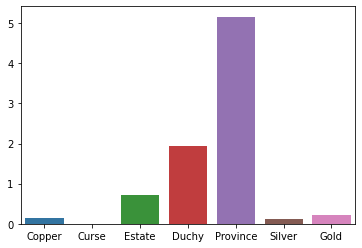

In [43]:
sns.barplot(x=cards, y=agent_weights)